In [2]:
import pandas as pd
import numpy as np


df = pd.read_csv('train.csv')

C:\Users\jyson\AppData\Local\Temp\ipykernel_18616\3862801624.py:5: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


In [3]:
print(len(df))

33538


In [4]:
df.columns

Index(['id', 'name', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'host_id', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'country_code', 'country', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_ch

<AxesSubplot:>

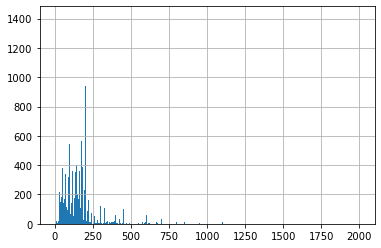

In [5]:
df['price'].hist(bins = 1000)

In [6]:
from math import isnan
from sklearn.model_selection import train_test_split

def to_float(s):
    try:
        ret = float(s)
    except:
        ret = -1
    if isnan(ret):
        ret = -1
    return ret

def to_int(s):
    try:
        ret = int(s)
    except:
        ret = -1
    return ret

categories_neigh = [x for x in list(set(df['neighbourhood_group_cleansed'])) if type(x) is str]
categories_room = [x for x in list(set(df['room_type'])) if type(x) is str]
categories_property = [x for x in list(set(df['property_type'])) if type(x) is str]
categories_cancellation = [x for x in list(set(df['cancellation_policy'])) if type(x) is str]
categories_super = [x for x in list(set(df['host_is_superhost'])) if type(x) is str]
categories_bed = [x for x in list(set(df['bed_type'])) if type(x) is str]
# categories_neigh_sm = [x for x in list(set(df['neighbourhood_cleansed'])) if type(x) is str]
categories_city = [x for x in list(set(df['city'])) if type(x) is str]



print(len(categories_room))

def create_feature(row):
    guest_num = to_int(row.guests_included)
    guest_cap = to_int(row.extra_people)
    bedrooms = to_int(row.bedrooms)
    bathrooms = to_int(row.bathrooms)
    rating = to_float(row.review_scores_rating)
    # add features
    beds = to_int(row.beds)
    cleanliness = to_float(row.review_scores_cleanliness)
    location = to_float(row.review_scores_location)
    # review_month = to_float(row.reviews_per_month)
    accuracy = to_float(row.review_scores_accuracy)
    accommodation = to_int(row.accommodates)

    # add features
    one_hot_neigh = [int(row.neighbourhood_group_cleansed == category) for category in categories_neigh]
    one_hot_roomtype = [int(row.room_type == category) for category in categories_room]
    one_hot_property = [int(row.property_type == category) for category in categories_property]
    one_hot_cancellation = [int(row.cancellation_policy == category) for category in categories_cancellation]
    # one_hot_super = [int(row.host_is_superhost == category) for category in categories_super]
    one_hot_bed = [int(row.bed_type == category) for category in categories_bed]
    # one_hot_neigh_sm = [int(row.neighbourhood_cleansed == category) for category in categories_neigh]
    one_hot_city = [int(row.city == category) for category in categories_city]


    
    # return [guest_num, guest_cap, bedrooms, bathrooms, rating] + one_hot_neigh
    return [guest_num, guest_cap, bedrooms, bathrooms, rating, beds, cleanliness, location, accuracy, accommodation] \
        + one_hot_neigh + one_hot_roomtype + one_hot_property +one_hot_cancellation + one_hot_city + one_hot_bed
    # return [bathrooms, bedrooms, beds, guest_num, location, cleanliness] + one_hot_bed + one_hot_neigh + one_hot_property

train_X, train_y = [], []
# test_X, test_y = [], []

# X = df.drop('price', axis=1)
# y = df['price']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

for (idx, row) in df.iterrows():
    price = float(row.price)
    feature = create_feature(row)

    train_X.append(feature)
    # test_X.append(feature)
    train_y.append(price)
    # test_y.append(price)
print(len(train_X), len(train_y))

3
33538 33538


In [7]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import HistGradientBoostingRegressor


# regr = linear_model.LinearRegression()
regr = HistGradientBoostingRegressor()
# regr.fit(train_X, train_y)
regr.fit(train_X, train_y)
predict_train = regr.predict(train_X)

In [8]:
# rmse
def rmse(actual, pred):
    return np.sqrt(np.mean((actual - pred)**2))
# test set should have less root mean squared error
rmse(train_y, predict_train)#, rmse(y_test, predict_test)
# 111.88236468952144

86.29385855764892

In [10]:
import pandas as pd

test_df = pd.read_csv('test.csv')

C:\Users\jyson\AppData\Local\Temp\ipykernel_18616\3100640438.py:3: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv('test.csv')


In [11]:
test_ids, test_X = [], []
for (idx, row) in test_df.iterrows():
    feature = create_feature(row)
    test_ids.append(row.id)
    test_X.append(feature)
test_y = regr.predict(test_X)

In [12]:
print(len(test_y))

17337


In [13]:
output_df = pd.DataFrame()
output_df['Id'] = test_ids
output_df['Predicted'] = test_y
output_df.to_csv('simple_linear_regression_baseline.csv', index = False)

### stop here

In [84]:
import numpy as np

mean = np.median(list(df['price']))

In [85]:
output_df = pd.DataFrame()
output_df['Id'] = test_ids
output_df['Predicted'] = [mean for i in range(len(test_ids))]
output_df.to_csv('mean_value_baseline.csv', index = False)